## Mastering Gradient Descent: 
A Comprehensive Guide to Optimizing Machine Learning Models

### Import Libraries

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

### Load Data

In [25]:
df = pd.read_csv('data/salary.csv')

### Let's extract a subset of the dataset to simplify the calculations

In [26]:
df = df.head(2)

In [29]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


### Split Data into Feature and Label

In [30]:
X = df[['YearsExperience']]
y = df['Salary']

### Define Variables

In [31]:
lr = 0.01 # learning rate
epoch = 100 # Epoch

loss_function = 'mean_squared_error' # loss function

### Get Number of Features

In [32]:
input_dim = X.shape[1]

In [33]:
input_dim

1

### Define Model Architecture

In [34]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1, input_dim=input_dim) 
    ])
    return model

### Define Function for Model Training

In [35]:
# Train the model while keeping track of coefficients and bias at each epoch
def train_model(X_train, y_train, lr, epoch, loss_function):
    
    # Compile the model with a specified optimizer and learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    
    model = create_model()
    model.compile(optimizer=optimizer, loss=loss_function)
    
    # Initialize lists to store historical weights and bias
    weights_history = []
    bias_history = []
    loss_history = []
    
    # Custom training loop
    for epoch in range(epoch):
        model.fit(X_train, y_train, epochs=1, verbose=0)  # Train for 1 epoch
        
        # Record weights and bias after each epoch
        weights = model.layers[0].get_weights()[0].flatten()
        bias = model.layers[0].get_weights()[1][0]
        
        # Calculate loss - mean squared loss
        loss = np.mean((np.dot(X, weights) + bias - y.values)**2)
        
        weights_history.append(weights)
        bias_history.append(bias)
        loss_history.append(loss)
    
    return weights_history, bias_history, loss_history

### Train Model

In [36]:
weights_history, bias_history, loss_history = train_model(X, y, lr, epoch, loss_function)

### Visualize Model Performance
- Plot 1: To visualize loss with respect to model parameters (weights & bias)
- Plot 2: To visualize loss with respect to epochs

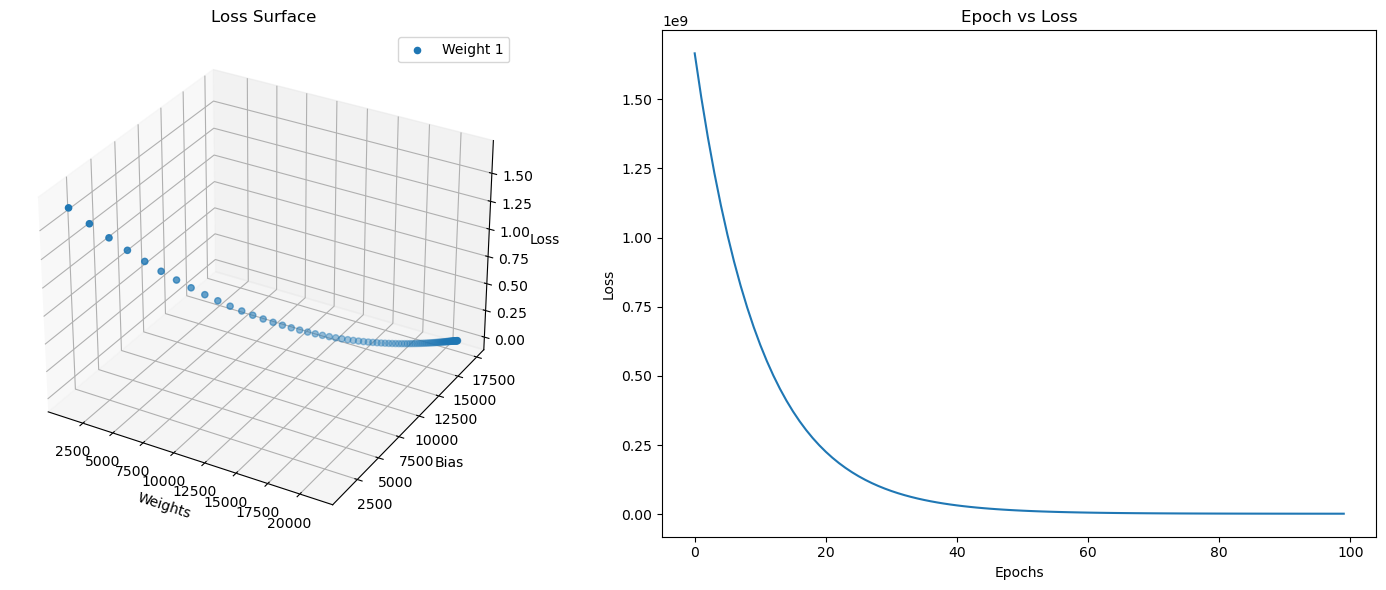

In [37]:
# Plot loss with respect to weights and bias
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

weights_history = np.array(weights_history)
bias_history = np.array(bias_history)
loss_history = np.array(loss_history)

# Plot loss with respect to each weight individually
for i in range(input_dim):
    ax1.scatter(weights_history[:, i], bias_history, loss_history, label=f'Weight {i+1}')

ax1.set_xlabel('Weights')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Loss')
ax1.set_title('Loss Surface')
ax1.legend()

# Plot epoch versus loss
ax2.plot(range(len(loss_history)), loss_history)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Epoch vs Loss')

plt.tight_layout()
plt.show()

### Let's check model parameters

In [45]:
# We have 100 weights - corresponding to each epoch as the epoch value is also 100
len(weights_history)

100

In [46]:
# We have 100 bias - corresponding to each epoch as the epoch value is also 100
len(bias_history)

100

In [51]:
# First 3 weights
weights_history[:3]

array([[1033.4912],
       [2016.4265],
       [2951.331 ]], dtype=float32)

In [52]:
# First 3 bias
bias_history[:3]

array([ 855.47876, 1669.0454 , 2442.7502 ], dtype=float32)

### Let's calculate gradient manually

In [55]:
# Dataset - features and labels
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [56]:
# Given values
X = [1.1, 1.3]
y = [39343.0, 46205.0]


# Let'ss say for example initial random weights and bias are as follows
weight = 1033.4912
bias = 855.47876
learning_rate = 0.01
n = len(X) # total number of data points in dataset

In [58]:
# Calculate the gradients w.r.t weight and bias
gradient_w = (-2/n) * sum([X[i] * (y[i] - (weight * X[i] + bias)) for i in range(n)])
gradient_b = (-2/n) * sum([(y[i] - (weight * X[i] + bias)) for i in range(n)])

In [60]:
print(gradient_w, gradient_b)

-98293.526496 -81356.6636


In [61]:
# Update the weights and bias
weight_new = weight - learning_rate * gradient_w
bias_new = bias - learning_rate * gradient_b

In [62]:
print(weight_new, bias_new)

2016.42646496 1669.045396


#### Comparison between the newly obtained weights and biases with those generated by the model during its training phase

In [63]:
print("Gradient with respect to weight:", gradient_w)
print("Gradient with respect to bias:", gradient_b)
print("New weight:", weight_new)
print("New bias:", bias_new)

Gradient with respect to weight: -98293.526496
Gradient with respect to bias: -81356.6636
New weight: 2016.42646496
New bias: 1669.045396
